In [12]:
import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # creating instance of StandardScaler

from sklearn import metrics

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

import tensorflow as tf 

from IPython.display import display, Image

from keras.models import Sequential

from keras.layers import Dense

from sklearn.metrics import roc_curve, roc_auc_score, auc

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.shape

(768, 9)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### handling outlayers 

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
IQR

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64

In [10]:
# this mean that any thing less then mini and greater then max print it 
((data < (Q1 - 1.5 * IQR))  | (data > (Q3 + 1.5 * IQR))).sum()

Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

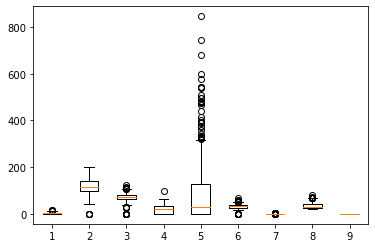

In [13]:
display(Image(filename='data with outlayers.png'))

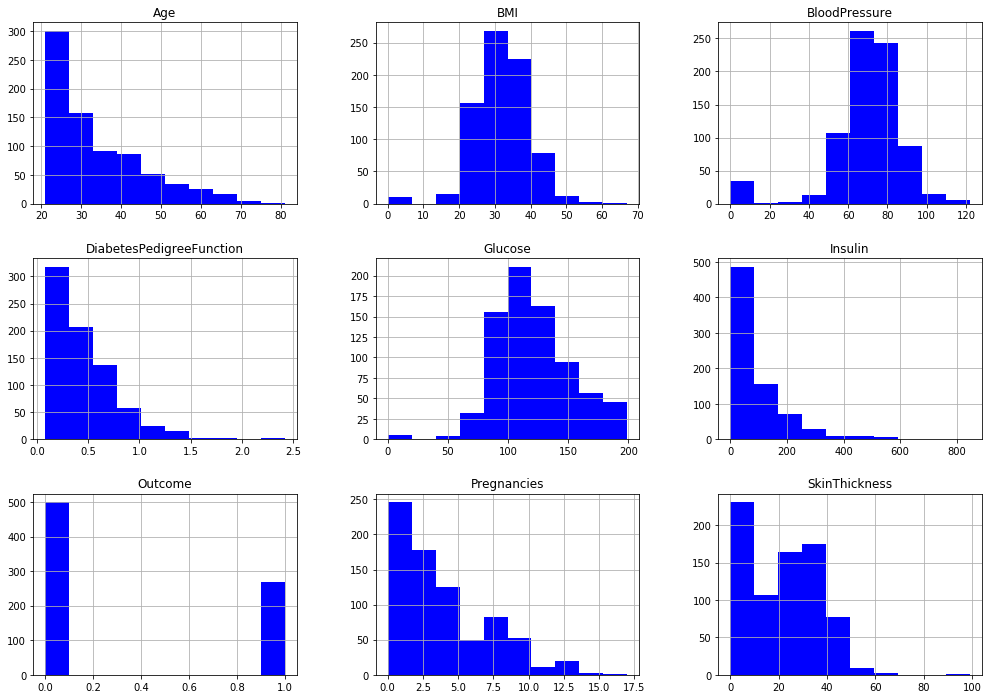

In [14]:
data.hist(figsize=(17,12),color='blue') 
plt.show()

In [15]:
names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin'
         ,'BMI','DiabetesPedigreeFunction','Age','Outcome']

In [16]:
for x in names:
    #plt.boxplot(data[x])
    #plt.show() 
    
    a = data[x].quantile(0.10)
    b = data[x].quantile(0.90)
    
    #print(data.skew())
    Q1=data[x].quantile(0.25)
    Q3=data[x].quantile(0.75)
    IQR=Q3-Q1
    Min= Q1 - 1.5 * IQR
    Max= Q3 + 1.5 * IQR
    
    data[x] = np.where(data[x] <Min, a,data[x])
    data[x] = np.where(data[x] >Max, b,data[x])

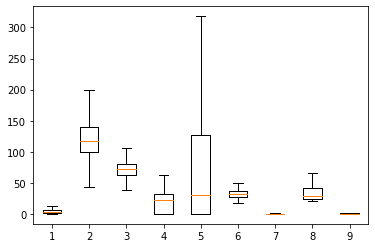

In [17]:
display(Image(filename='data after handling out layers.png'))

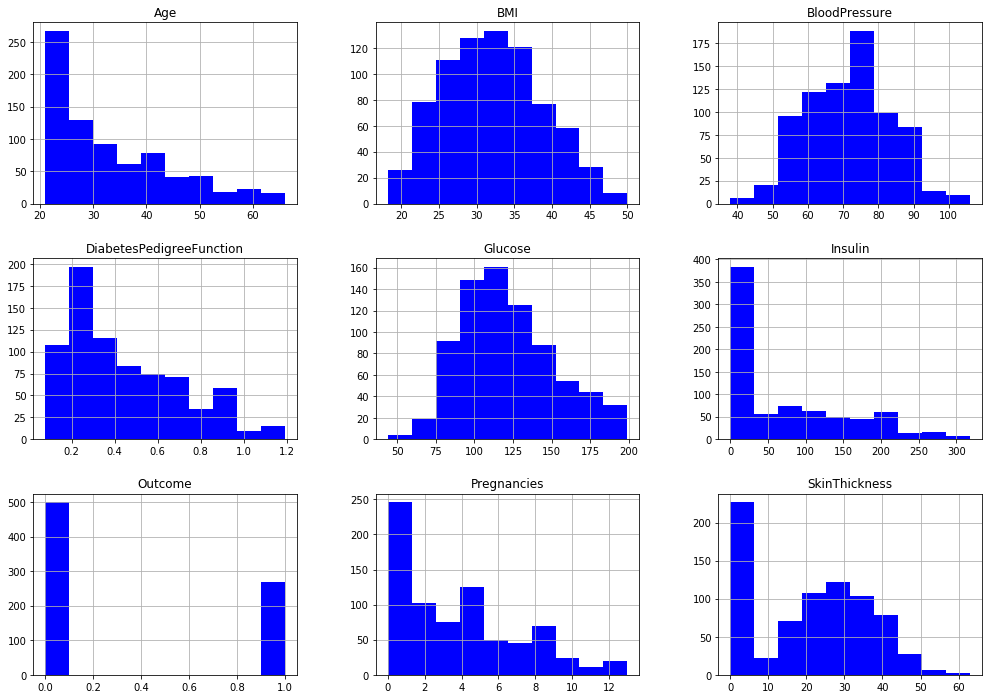

In [18]:
data.hist(figsize=(17,12),color='blue') 
plt.show()

In [19]:
y = data['Outcome']
X = data.iloc[:,:-1]

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.15)

print(X_train.shape)
print(X_test.shape)

(652, 8)
(116, 8)


In [21]:
# ANN 

classifier = Sequential()

classifier.add(tf.keras.layers.Flatten())
classifier.add(Dense(units= 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
classifier.add(Dense(units= 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
# train 
history = classifier.fit(X_train, y_train, batch_size = 10, epochs = 1000)

Epoch 1/1000
66/66 [==============================] - 1s 867us/step - loss: 0.6816 - accuracy: 0.6472
Epoch 2/1000
66/66 [==============================] - 0s 881us/step - loss: 0.6654 - accuracy: 0.6472
Epoch 3/1000
66/66 [==============================] - 0s 721us/step - loss: 0.6574 - accuracy: 0.6472
Epoch 4/1000
66/66 [==============================] - 0s 628us/step - loss: 0.6496 - accuracy: 0.6472
Epoch 5/1000
66/66 [==============================] - 0s 661us/step - loss: 0.6389 - accuracy: 0.6488
Epoch 6/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.6288 - accuracy: 0.6564
Epoch 7/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.6154 - accuracy: 0.6979
Epoch 8/1000
66/66 [==============================] - 0s 848us/step - loss: 0.6065 - accuracy: 0.6948
Epoch 9/1000
66/66 [==============================] - 0s 630us/step - loss: 0.5990 - accuracy: 0.7009
Epoch 10/1000
66/66 [==============================] - 0s 679us/step - loss: 0.5944 - 

In [23]:
# test 
y_pred_test = classifier.predict(X_test) 
y_pred_test=y_pred_test>0.5 

y_pred_train = classifier.predict(X_train)
y_pred_train=y_pred_train>0.5

In [24]:
print("Accuracy on Train Set ==> ",metrics.accuracy_score(y_train,y_pred_train)*100)
print("Accuracy on Test Set ==> ",metrics.accuracy_score(y_test,y_pred_test)*100)

Accuracy on Train Set ==>  78.83435582822086
Accuracy on Test Set ==>  79.3103448275862


In [25]:
val_loss, val_acc = classifier.evaluate(X_test, y_test) 
print(val_loss)
print(val_acc)

4/4 [==============================] - 0s 3ms/step - loss: 0.4327 - accuracy: 0.7931
0.43265777826309204
0.7931034564971924


In [26]:
c=confusion_matrix(y_test,y_pred_test) 
print('Confusion Matrix:\n',c)

Confusion Matrix:
 [[68 10]
 [14 24]]


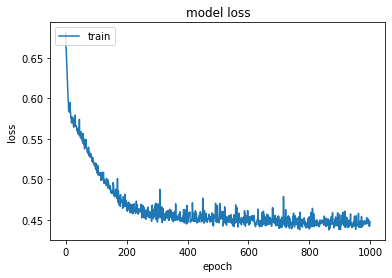

In [27]:
history.history.keys() 

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc = 'upper left')
plt.show() 

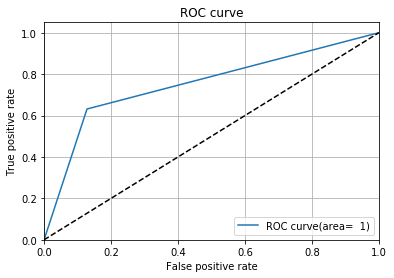

In [28]:
# ROC 

fpr,tpr,_=roc_curve(y_test,y_pred_test)

#calculate AUC
roc_auc=auc(fpr,tpr)

#print('ROC AUC: %0.2f' % roc_auc)

#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()